# The Xylo™ IMU preprocessing interface
Xylo™ IMU contains a set of preprocessing blocks designed for encoding IMU data as events for inference using the SNN core on Xylo.

In [21]:
# - Data processing
import numpy as np

# - Plotting and config
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.6, 3.6]
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.size"] = 12

try:
    from rich import print
except:
    pass

from IPython.display import Image

# - Import modules
from rockpool.devices.xylo.imu.preprocessing import (
    Quantizer,
    IMUIFSim
)
from samna.xyloImu.configuration import InputInterfaceConfig
from rockpool.timeseries import TSEvent

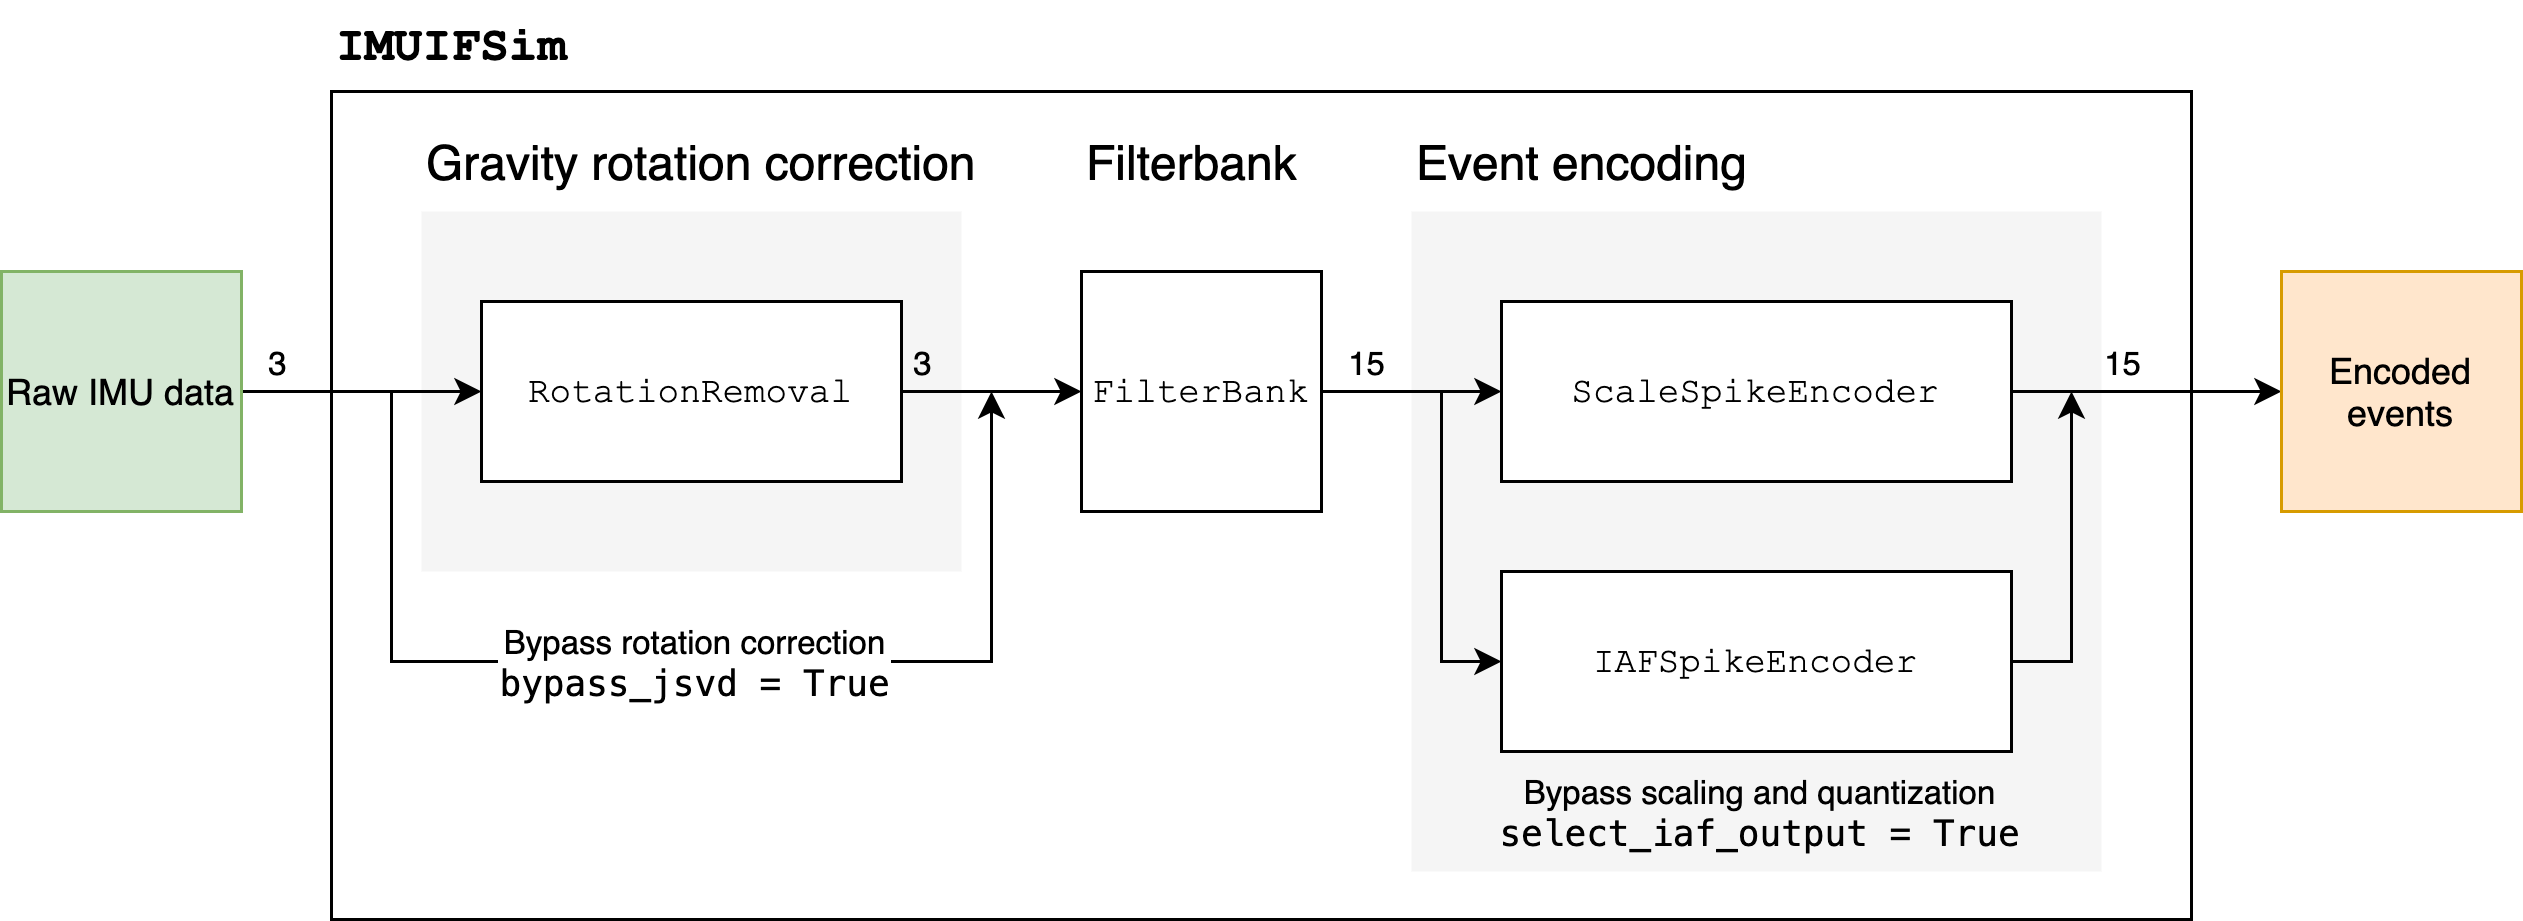

In [23]:
Image('imu-ifsim-module.png')

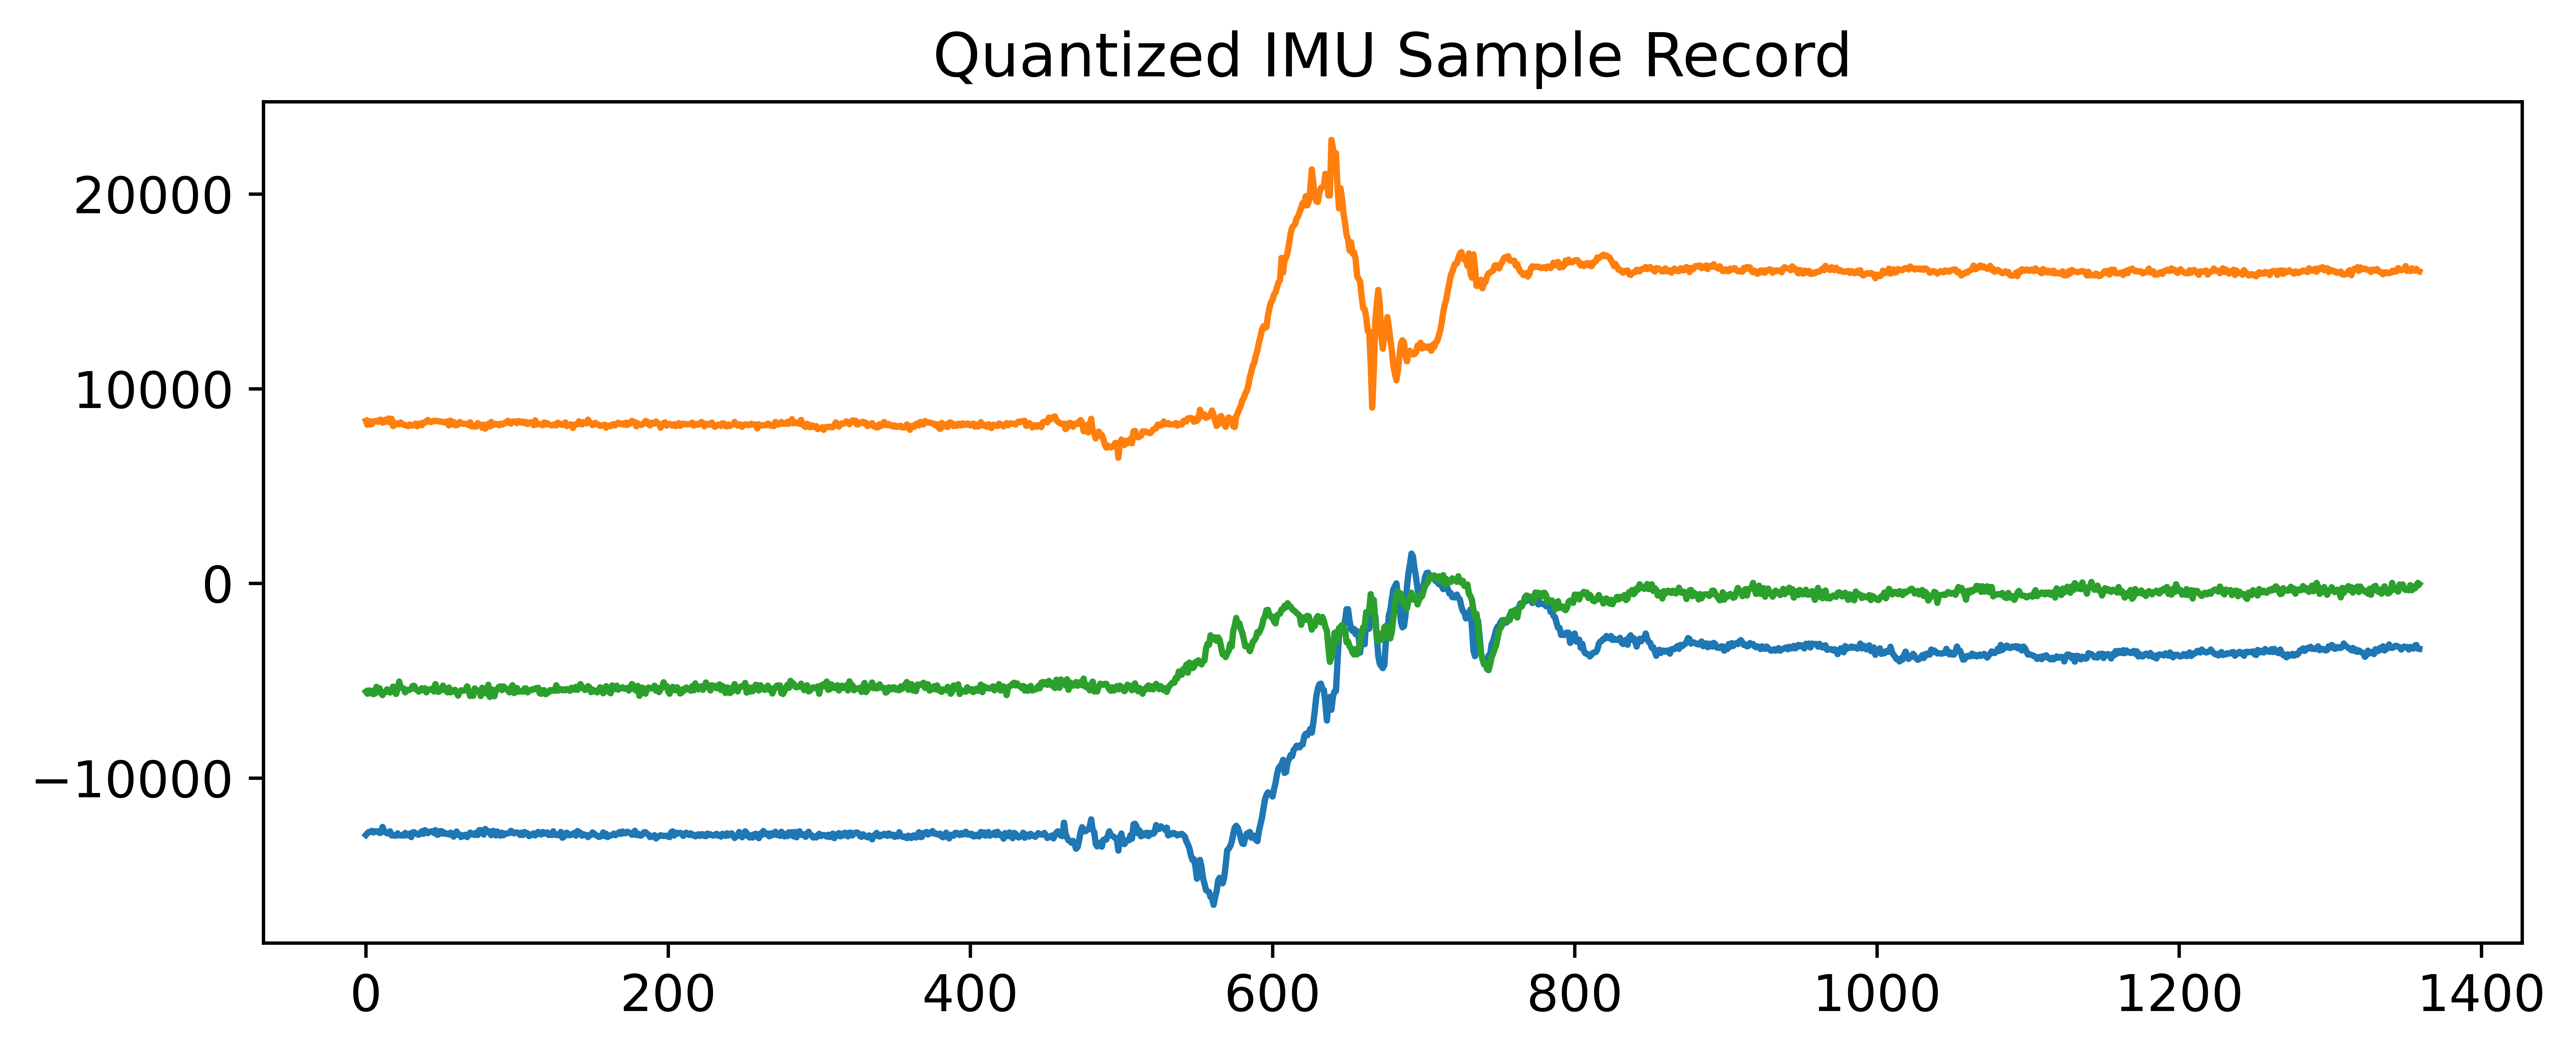

In [11]:
## Step 1 : Quantize the data
with open("data.npy", "rb") as f:
    data = np.load(f)
    
quantizer = Quantizer(scale=0.49, num_bits=16)

data_quantized, _, _ = quantizer(data)
data_quantized.shape

plt.figure()
plt.plot(data_quantized[0])
plt.title(f"Quantized IMU Sample Record")
plt.show()


In [12]:
mod_IMUIF = IMUIFSim()



/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/rockpool_GIT/rockpool/devices/xylo/imu/preprocessing/lookup.py:59: RuntimeWarning: divide by zero encountered in divide
  self.cot2_vals = 1 / np.tan(2 * self.angles_radian)


In [20]:
IMUIFSim?

Init signature: IMUIFSim(*args, **kwargs)
Docstring:     
A :py:class:`.Module` that simulates the IMU signal preprocessing on Xylo IMU

This module simulates the Xylo IMU front-end stage. This is a signal-to-event core that consists of rotation removal units, low-pass filters, and a spike generator. The module takes in a 3D IMU signal and outputs a spike train.

See Also:
    For example usage of the :py:class:`.IMUIFSim` Module, see :ref:`/devices/xylo-imu/imu-if.ipynb`
Init docstring:
Object constructor

Args:
    shape (Optional[Union[Tuple, int]], optional): the shape of the input-output transformation. Defaults to (3, 15).
    select_iaf_output (bool, optional): If true, the output of the module is encoded using IAF spike encoding. If false, the output of the module is encoded using scale spike encoding. Defaults to False.
    bypass_jsvd (bool, optional): If true, the module does not perform the rotation removal stage. Defaults to False.
    filter_list (Optional[List[BandPassFi

In [19]:
print(IMUIFSim(select_iaf_output = True))

/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/rockpool_GIT/rockpool/devices/xylo/imu/preprocessing/lookup.py:59: RuntimeWarning: divide by zero encountered in divide
  self.cot2_vals = 1 / np.tan(2 * self.angles_radian)


IMUIFSim  with shape (3, 15) {
    ModSequential 'model' with shape (3, 15) {
        RotationRemoval '0_RotationRemoval' with shape (3, 3) {
            ModSequential 'sub_estimate' with shape (3, 9) {
                SubSpace '0_SubSpace' with shape (3, 9)
                SampleAndHold '1_SampleAndHold' with shape (9, 9)
            }
        }
        FilterBank '1_FilterBank' with shape (3, 15)
        IAFSpikeEncoder '2_IAFSpikeEncoder' with shape (15, 15)
    }
}

In [13]:
result, _, _ = mod_IMUIF(data_quantized)
result.shape

/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/rockpool_GIT/rockpool/devices/xylo/imu/preprocessing/jsvd.py:79: UserWarning: The input covariance matrix does not seem to be PSD! This may cause numerical issues in computation!
  warnings.warn(
/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/rockpool_GIT/rockpool/devices/xylo/imu/preprocessing/jsvd.py:248: UserWarning: negative diagonal elements encountered during covariance update!
  warnings.warn(


(1, 1360, 15)

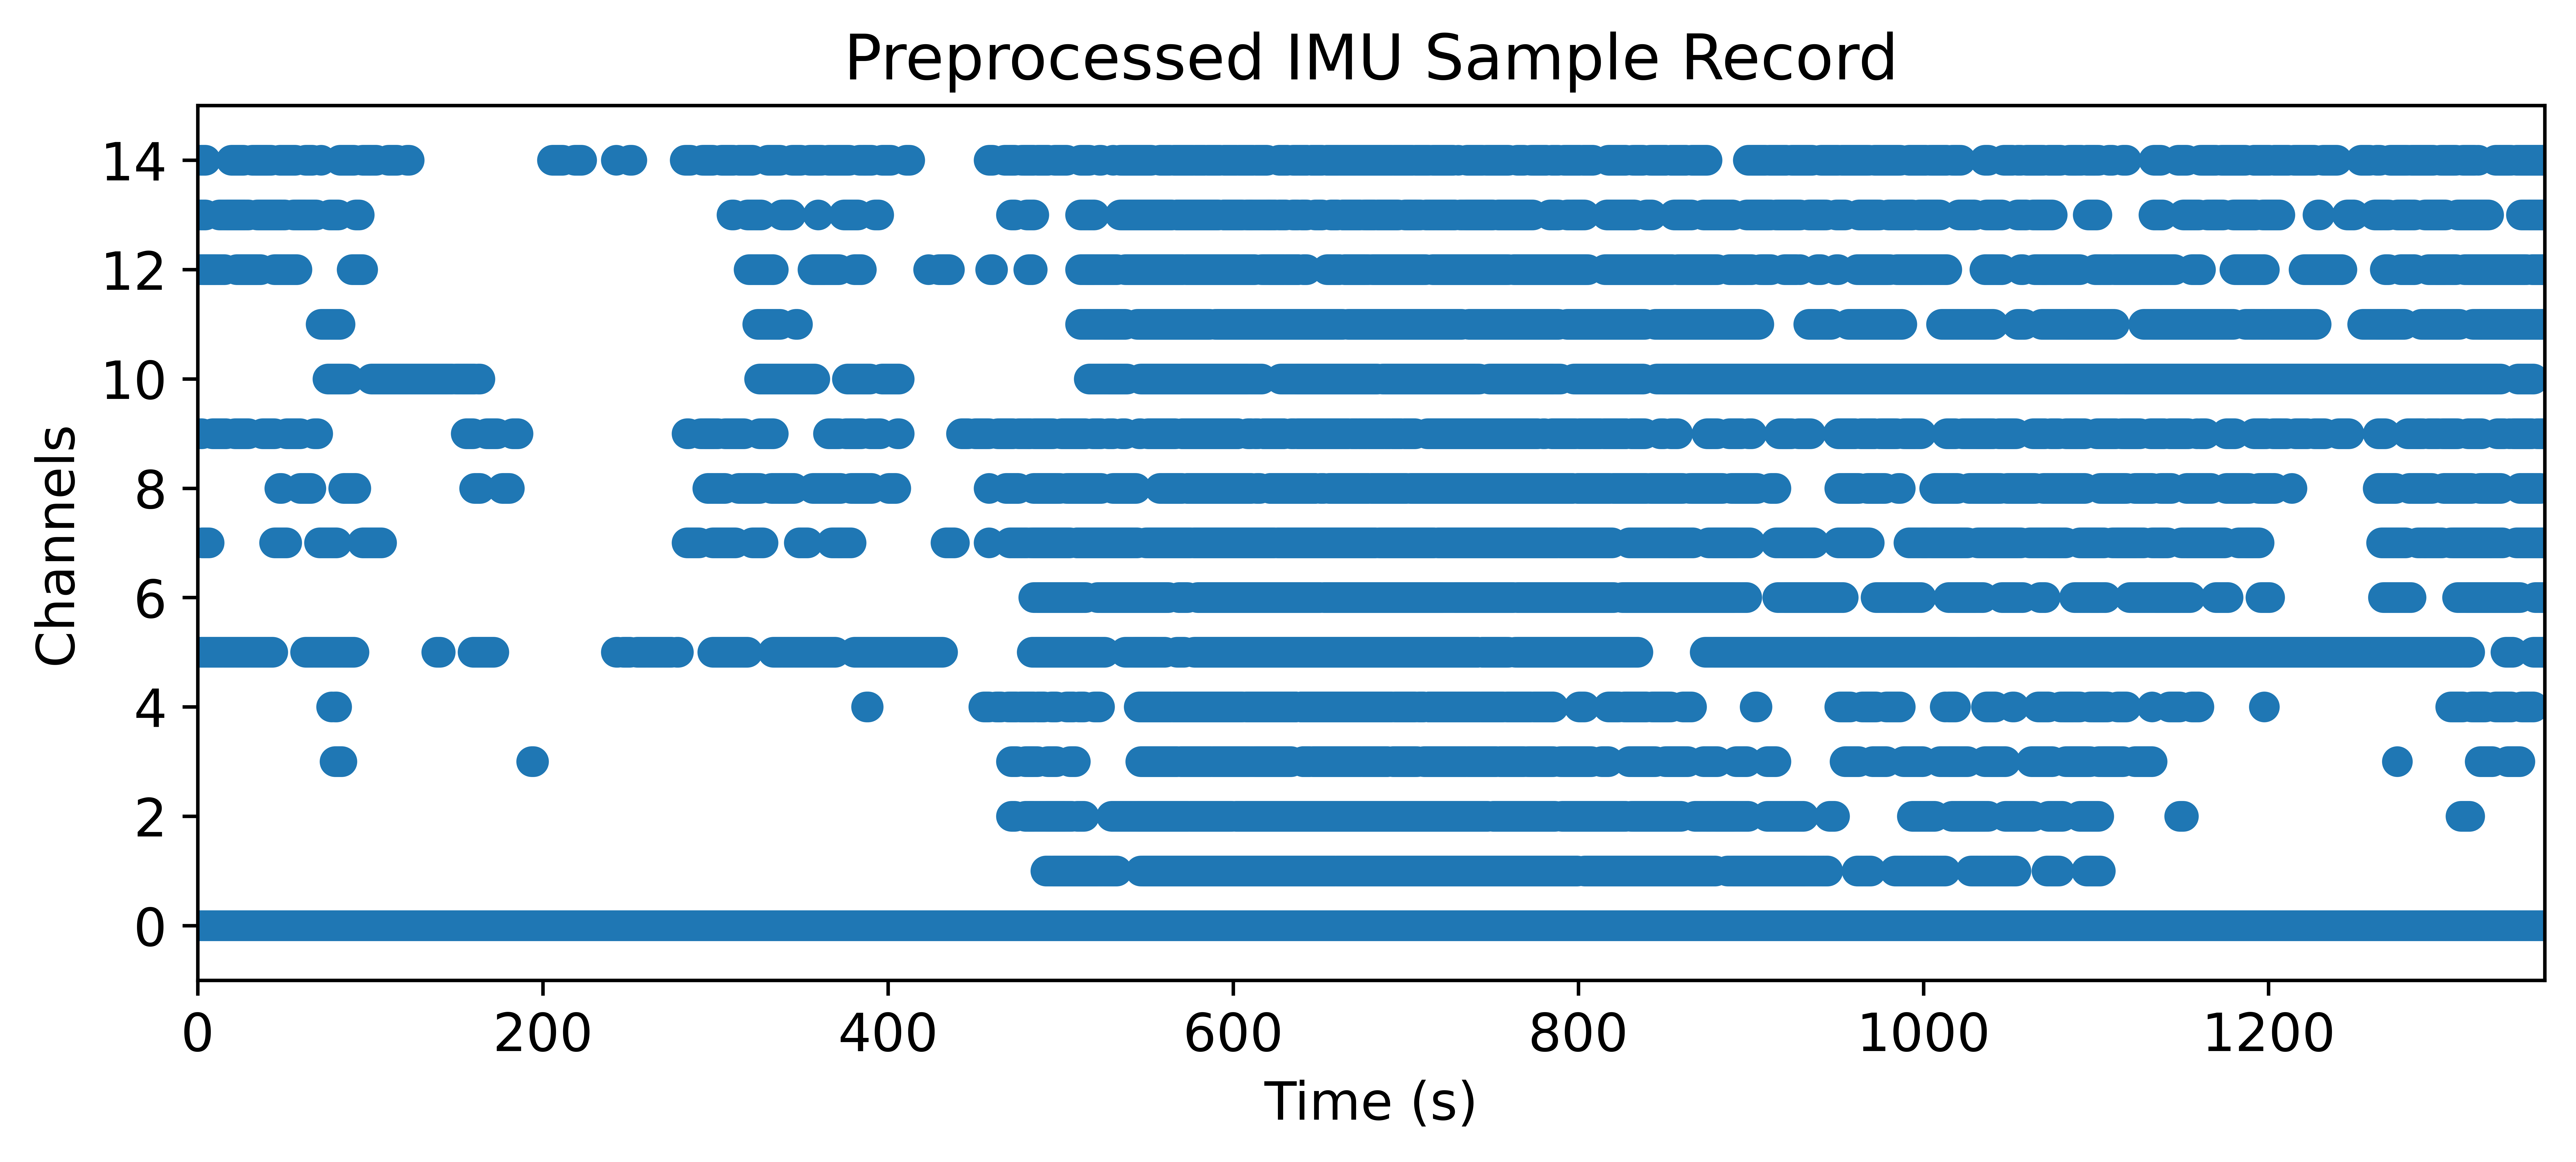

In [14]:
plt.figure()
TSEvent.from_raster(result[0]).plot()
plt.title(f"Preprocessed IMU Sample Record")
plt.show()

In [15]:
config = mod_IMUIF.export_config()
print(config)

xyloImu::configuration::InputInterfaceConfig(enable=1, configuration_timeout=3.000000, estimator_k_setting=4, 
select_iaf_output=0, bypass_jsvd=0, update_matrix_threshold=10, delay_threshold=500, bpf_bb_values={ 6 6 5 5 4 6 6 
5 5 4 6 6 5 5 4 }, bpf_bwf_values={ 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 }, bpf_baf_values={ 9 9 10 10 11 9 9 10 10 11 9 9
10 10 11 }, bpf_a1_values={ -64522 -64458 -63288 -62787 -59837 -64522 -64458 -63288 -62787 -59837 -64522 -64458 
-63288 -62787 -59837 }, bpf_a2_values={ 31754 31754 30771 30771 28888 31754 31754 30771 30771 28888 31754 31754 
30771 30771 28888 }, scale_values={ 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 }, iaf_threshold_values={ 1024 1024 1024 1024 
1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 })

In [16]:
config = InputInterfaceConfig(enable=True)
print(config.to_json())

{
    "value0": {
        "enable": true,
        "configurationTimeout": 3.0,
        "estimatorKSetting": 5,
        "selectIafOutput": false,
        "bypassJSVD": false,
        "updateMatrixThreshold": 255,
        "delayThreshold": 500,
        "bpfBbValues": {
            "value0": 6,
            "value1": 6,
            "value2": 6,
            "value3": 6,
            "value4": 6,
            "value5": 6,
            "value6": 6,
            "value7": 6,
            "value8": 6,
            "value9": 6,
            "value10": 6,
            "value11": 6,
            "value12": 6,
            "value13": 6,
            "value14": 6
        },
        "bpfBwfValues": {
            "value0": 8,
            "value1": 8,
            "value2": 8,
            "value3": 8,
            "value4": 8,
            "value5": 8,
            "value6": 8,
            "value7": 8,
            "value8": 8,
            "value9": 8,
            "value10": 8,
            "value11": 8,
            "value12": 8,
            "value13": 8,
            "value14": 8
        },
        "bpfBafValues": {
            "value0": 9,
            "value1": 9,
            "value2": 9,
            "value3": 9,
            "value4": 9,
            "value5": 9,
            "value6": 9,
            "value7": 9,
            "value8": 9,
            "value9": 9,
            "value10": 9,
            "value11": 9,
            "value12": 9,
            "value13": 9,
            "value14": 9
        },
        "bpfA1Values": {
            "value0": -57941,
            "value1": -57941,
            "value2": -57941,
            "value3": -57941,
            "value4": -57941,
            "value5": -57941,
            "value6": -57941,
            "value7": -57941,
            "value8": -57941,
            "value9": -57941,
            "value10": -57941,
            "value11": -57941,
            "value12": -57941,
            "value13": -57941,
            "value14": -57941
        },
        "bpfA2Values": {
            "value0": 31754,
            "value1": 31754,
            "value2": 31754,
            "value3": 31754,
            "value4": 31754,
            "value5": 31754,
            "value6": 31754,
            "value7": 31754,
            "value8": 31754,
            "value9": 31754,
            "value10": 31754,
            "value11": 31754,
            "value12": 31754,
            "value13": 31754,
            "value14": 31754
        },
        "scaleValues": {
            "value0": 5,
            "value1": 5,
            "value2": 5,
            "value3": 5,
            "value4": 5,
            "value5": 5,
            "value6": 5,
            "value7": 5,
            "value8": 5,
            "value9": 5,
            "value10": 5,
            "value11": 5,
            "value12": 5,
            "value13": 5,
            "value14": 5
        },
        "iafThresholdValues": {
            "value0": 1024,
            "value1": 1024,
            "value2": 1024,
            "value3": 1024,
            "value4": 1024,
            "value5": 1024,
            "value6": 1024,
            "value7": 1024,
            "value8": 1024,
            "value9": 1024,
            "value10": 1024,
            "value11": 1024,
            "value12": 1024,
            "value13": 1024,
            "value14": 1024
        }
    }
}

In [17]:
mod_IMUIF.from_config(config)

IMUIFSim  with shape (3, 15) {
    ModSequential 'model' with shape (3, 15) {
        RotationRemoval '0_RotationRemoval' with shape (3, 3) {
            ModSequential 'sub_estimate' with shape (3, 9) {
                SubSpace '0_SubSpace' with shape (3, 9)
                SampleAndHold '1_SampleAndHold' with shape (9, 9)
            }
        }
        FilterBank '1_FilterBank' with shape (3, 15)
        ScaleSpikeEncoder '2_ScaleSpikeEncoder' with shape (15, 15)
    }
}